# The Bias Variance Tradeoff, Decision Trees, Bagging and Ensemble Learning

In [1]:
Define Bias

Define Variance

Math proof here


demo with varying values of k



SyntaxError: invalid syntax (<ipython-input-1-2b222cbdd769>, line 1)

![alt text](knn.gif "Title")

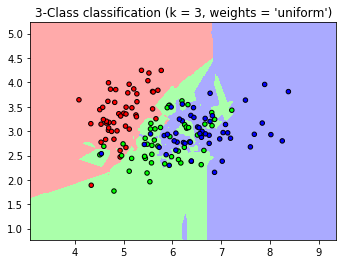

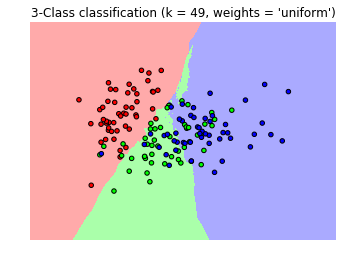

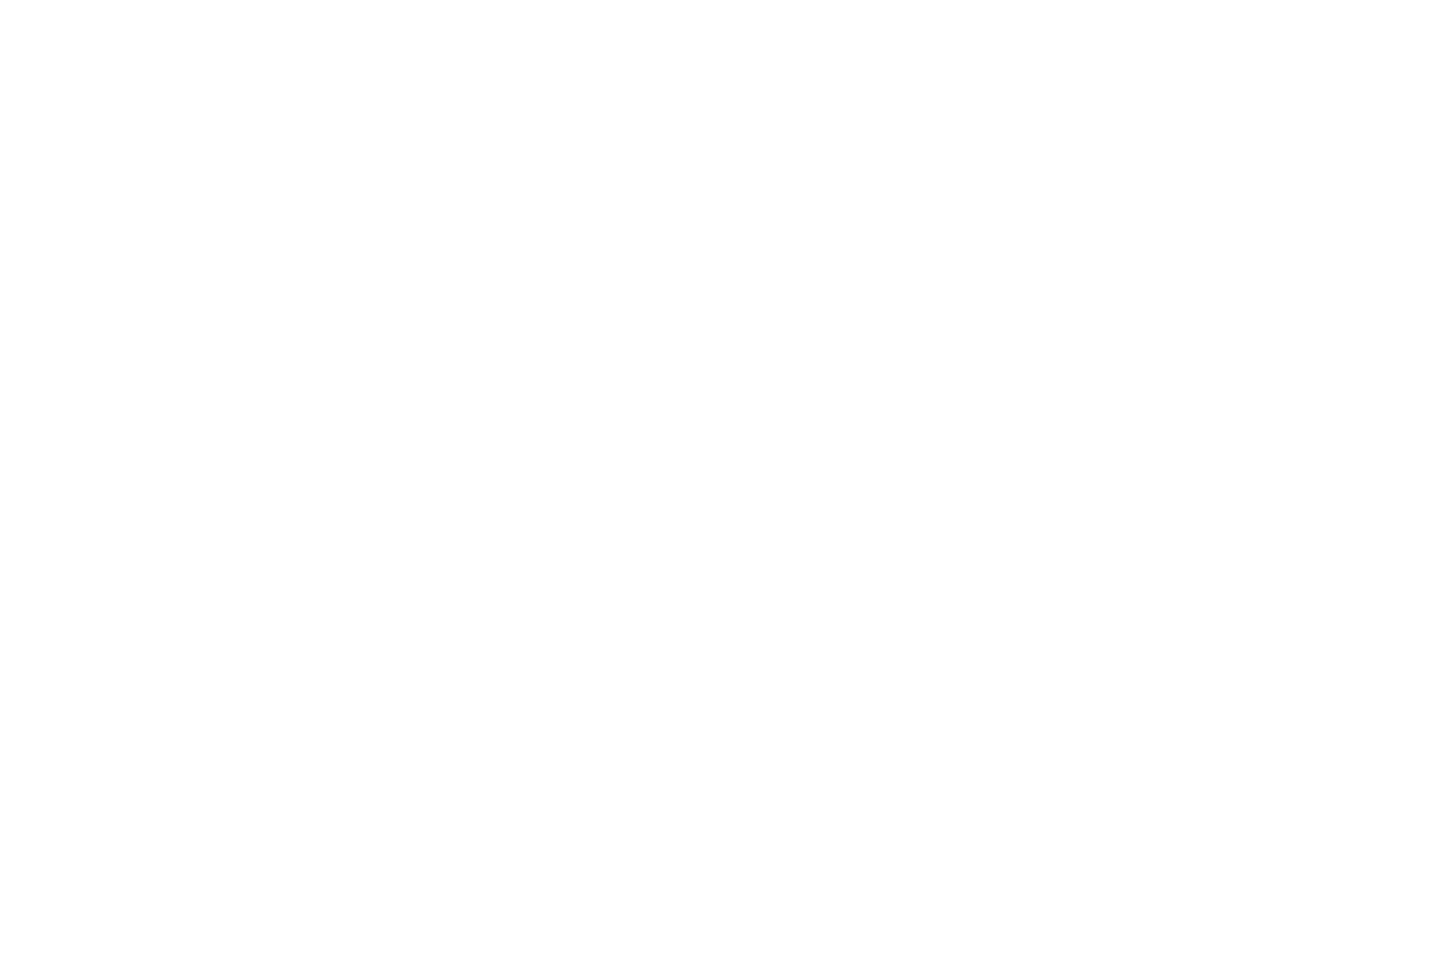

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
import os.path
np.random.seed(189)


#From http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
X = X + 0.3*np.random.randn(X.shape[0], X.shape[1])
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

weights ='uniform'

n_neighbors = 50
fig = plt.figure()
imgs = []
fakeimgs = []
imageFolder = "knnImages/"

#This will take about ~10 minutes to run 
for curr_num_neighbors in range(1,n_neighbors):

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(curr_num_neighbors, weights=weights)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (curr_num_neighbors, weights))

    filename = 'knn'+str(curr_num_neighbors)+'.png'
    plt.axis('on')
    #plt.savefig(imageFolder+filename, dpi=900)
    plt.axis('off')
    imgs.append([plt.imshow(plt.imread(imageFolder+filename),animated = True)])
    
fig = plt.figure(figsize = (25,25))
plt.clf()
ims2 = []
counter = 0
for i in range(1,n_neighbors):
    plt.axis('off')
    im = plt.imshow(imgs[i-1][0].get_array(),animated=True)
    ims2.append([im])


anim = animation.ArtistAnimation(fig, ims2, interval=100)


anim.save('knn.gif', writer='imagemagick', fps=60)
plt.show()

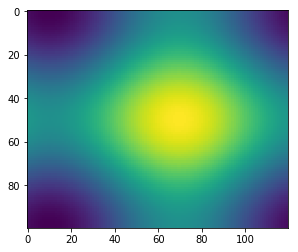

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])
plt.clf()
ims2 = []
counter = 0
for i in range(1,200,10):
    
    im = plt.imshow(ims[counter][0].get_array(),animated=True)
    ims2.append([im])
    counter +=1
    
ani = animation.ArtistAnimation(fig, ims2, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.mp4')

plt.show()

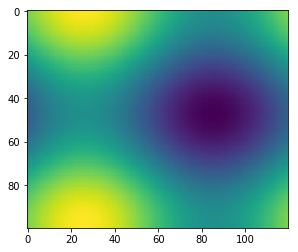

In [207]:
plt.imshow(ims[0][0].get_array())


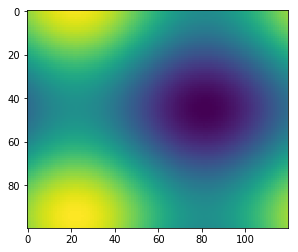

In [249]:
plt.imshow(ims[1][0].get_array())


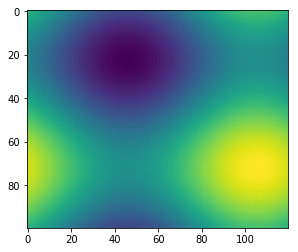

In [250]:
plt.imshow(ims[10][0].get_array())


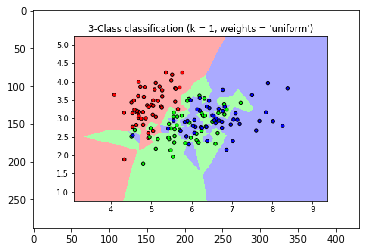

In [221]:
plt.imshow(imgs[0][0].get_array())


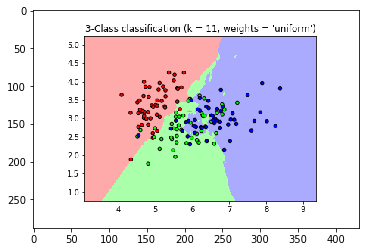

In [251]:
plt.imshow(imgs[1][0].get_array())


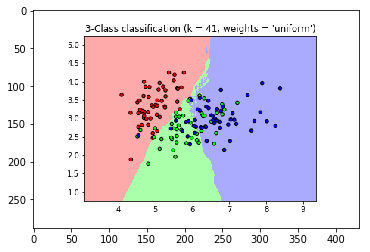

In [252]:
plt.imshow(imgs[4][0].get_array())


In [2]:
fig = plt.figure(figsize = (25,25))
plt.clf()
ims2 = []
counter = 0
for i in range(1,n_neighbors):
    plt.axis('off')
    im = plt.imshow(imgs[i-1][0].get_array(),animated=True)
    ims2.append([im])


anim = animation.ArtistAnimation(fig, ims2, interval=100)


anim.save('knn.gif', writer='imagemagick', fps=60)
plt.show()

NameError: name 'plt' is not defined